# Task 1: Iris Flower Classification

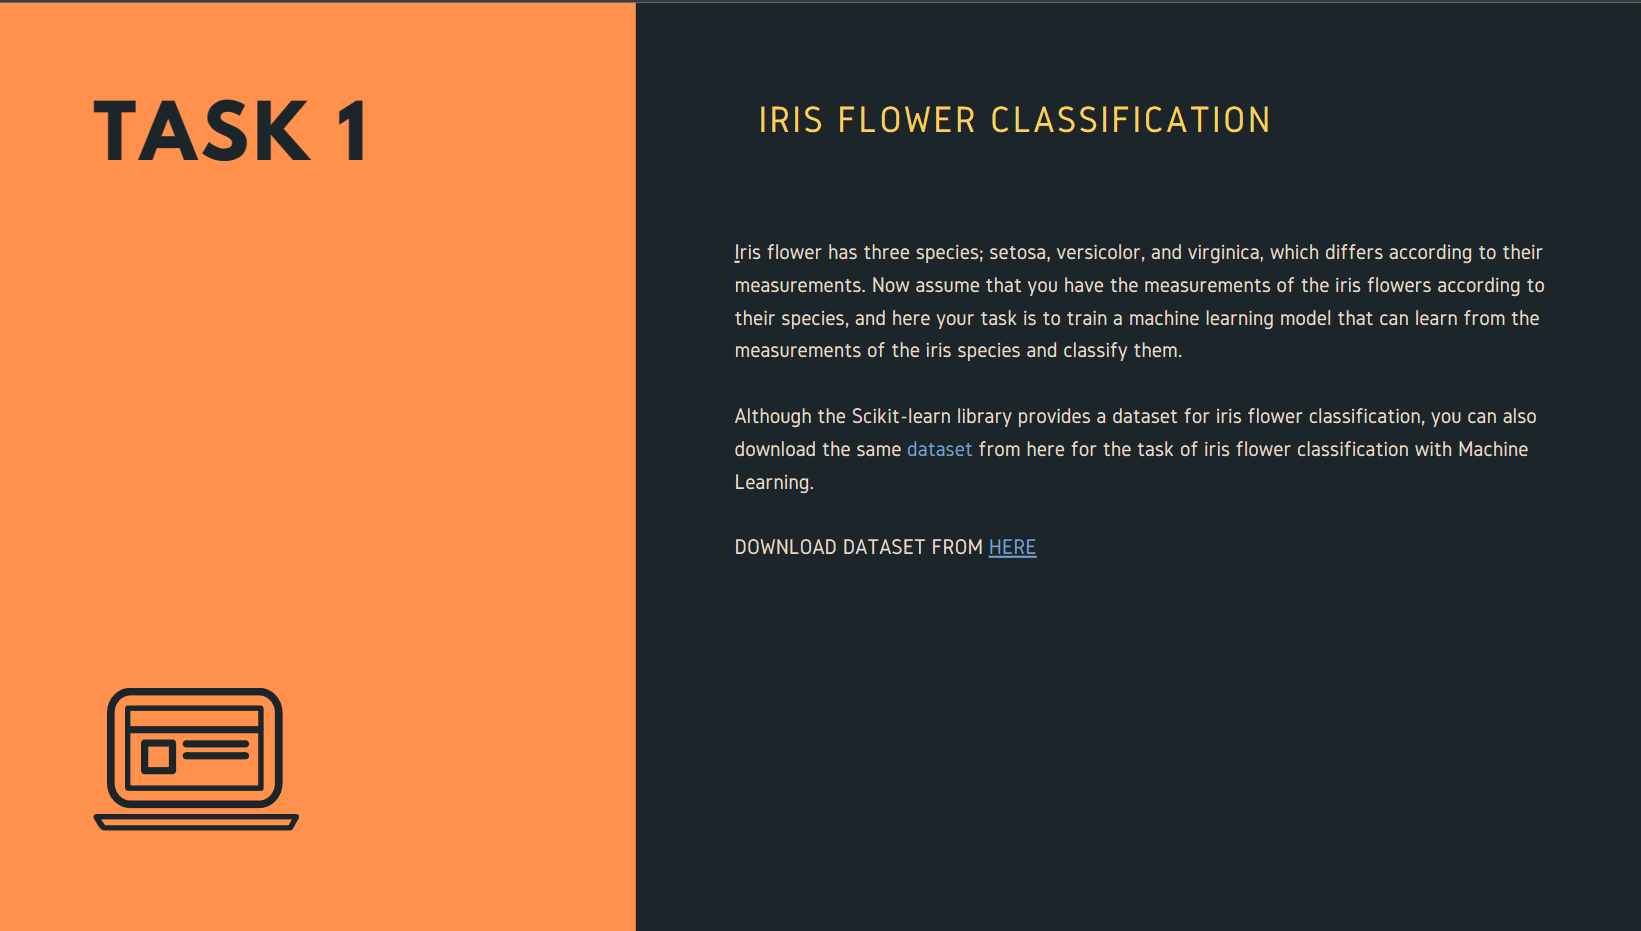

The aim is to classify iris flowers among three species such as Setosa, Versicolor or Virginica from measurements of sepals and petals length and width.

Types of Iris Flower
1.Setosa.
2.Versicolor.
3.Virginica.

The iris data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.
The central goal here is to design a model that makes useful classification for new flowers or in other words one which exhibits good generalization

# Importing Libraries

In [1]:
#Importing All the essential libraries for the project
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
df = pd.read_csv('Iriss.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Dekete a columns
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#To display no. of samples on each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Preprocessing the dataset

In [6]:
#Check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:>

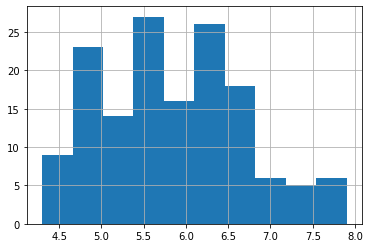

In [8]:
df['SepalLengthCm'].hist()

<AxesSubplot:>

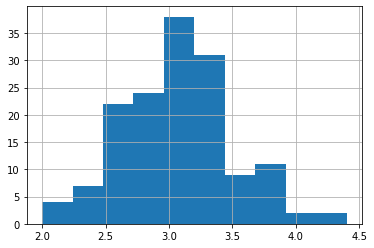

In [9]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

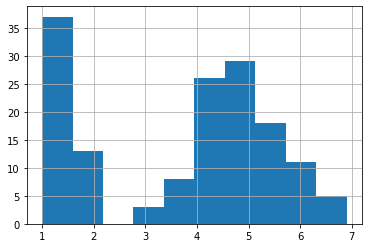

In [10]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

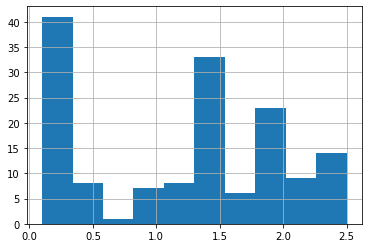

In [12]:
df['PetalWidthCm'].hist()

In [13]:
#Scatterplot
colors = ['red', 'orange', 'blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

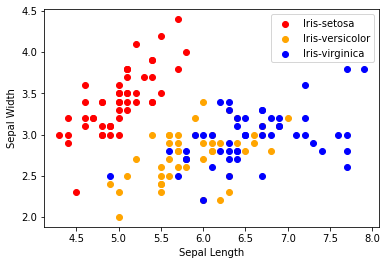

In [17]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

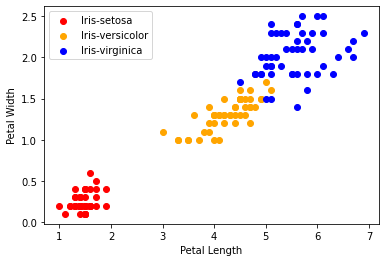

In [18]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label = species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

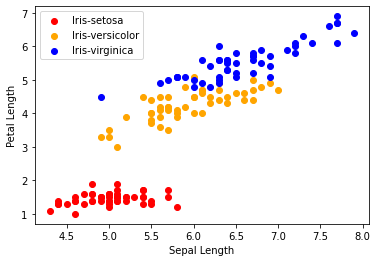

In [19]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

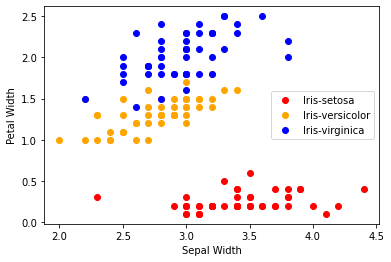

In [20]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label = species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

# Coorelation Matrix

In [21]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

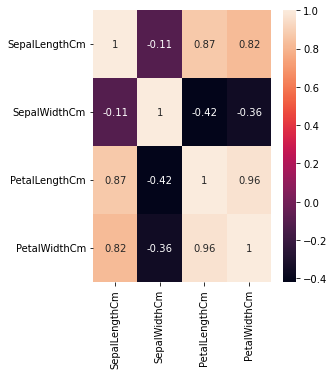

In [23]:
corr = df.corr()
fig,ax = plt.subplots(figsize=(4,5))
sns.heatmap(corr, annot=True, ax=ax)

# Label Encoder

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [45]:
from sklearn.model_selection import train_test_split
#train - 70
#test - 30
X = df.drop(columns = ['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [46]:
#Logestic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [47]:
model.fit(x_train, y_train)

C:\Users\235451\anaconda3.r\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
#print metric to get performance
print("Accuracy",model.score(x_test, y_test) * 100)

Accuracy 91.11111111111111


In [49]:
#knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [50]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [51]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


In [52]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [53]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [54]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  91.11111111111111
